In [1]:
import pandas as pd

# Sample data (replace this with your actual dataset)
data = {
    'Store': ['Store1', 'Store2', 'Store3', 'Store1', 'Store2', 'Store3'],
    'City': ['City1', 'City1', 'City2', 'City2', 'City3', 'City3'],
    'State': ['State1', 'State1', 'State2', 'State2', 'State3', 'State3'],
    'Week': [1, 1, 1, 2, 2, 2],
    'Quarter': [1, 1, 2, 2, 3, 3],
    'Price': [10, 12, 11, 9, 10, 11],
    'Demand': [100, 90, 110, 120, 100, 110]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Calculate variation within cities on a weekly basis
city_week_variation = df.groupby(['City', 'Week']).agg({'Price': 'std', 'Demand': 'std'}).reset_index()
city_week_variation['Price_CoV'] = city_week_variation['Price'] / city_week_variation['Price'].mean()
city_week_variation['Demand_CoV'] = city_week_variation['Demand'] / city_week_variation['Demand'].mean()

# Calculate variation between states on a quarterly basis
state_quarter_variation = df.groupby(['State', 'Quarter']).agg({'Price': 'std', 'Demand': 'std'}).reset_index()
state_quarter_variation['Price_CoV'] = state_quarter_variation['Price'] / state_quarter_variation['Price'].mean()
state_quarter_variation['Demand_CoV'] = state_quarter_variation['Demand'] / state_quarter_variation['Demand'].mean()

print("Variation within cities on a weekly basis:")
print(city_week_variation)
print("\nVariation between states on a quarterly basis:")
print(state_quarter_variation)

Variation within cities on a weekly basis:
    City  Week     Price    Demand  Price_CoV  Demand_CoV
0  City1     1  1.414214  7.071068   1.333333         1.0
1  City2     1       NaN       NaN        NaN         NaN
2  City2     2       NaN       NaN        NaN         NaN
3  City3     2  0.707107  7.071068   0.666667         1.0

Variation between states on a quarterly basis:
    State  Quarter     Price    Demand  Price_CoV  Demand_CoV
0  State1        1  1.414214  7.071068        1.2         1.0
1  State2        2  1.414214  7.071068        1.2         1.0
2  State3        3  0.707107  7.071068        0.6         1.0


SyntaxError: invalid non-printable character U+00A0 (717888761.py, line 3)

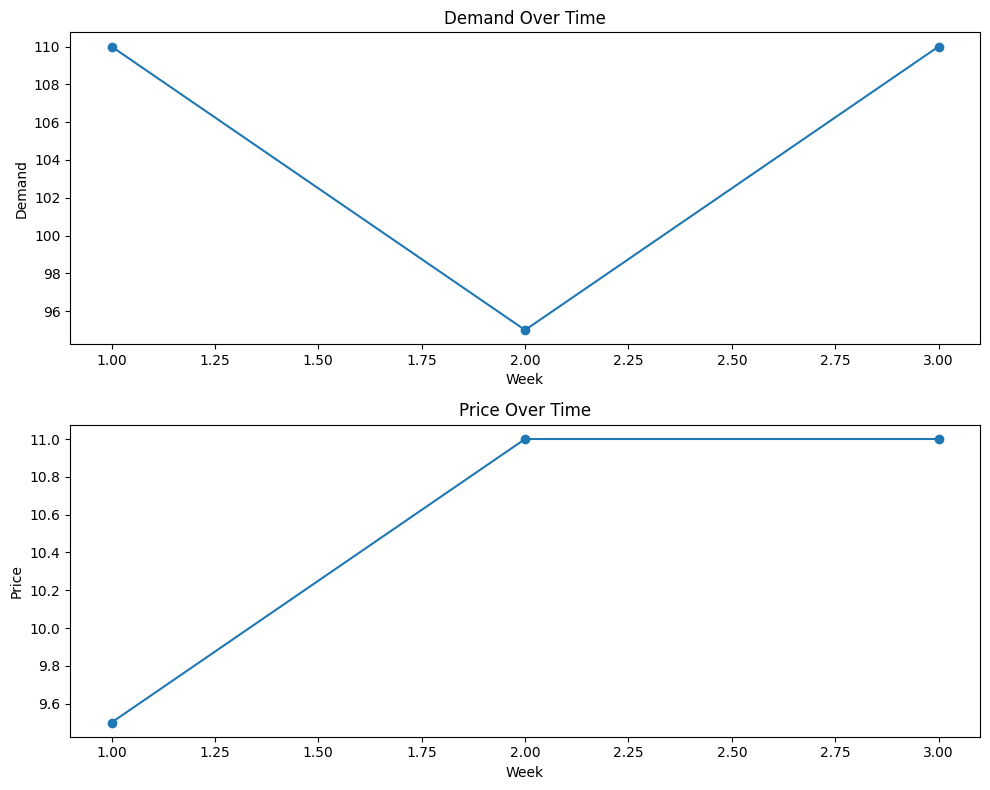

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'Store': ['Store1', 'Store1', 'Store1', 'Store2', 'Store2', 'Store2'],
    'Week': [1, 2, 3, 1, 2, 3],
    'Price': [10, 12, 11, 9, 10, 11],
    'Demand': [100, 90, 110, 120, 100, 110]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot demand and prices over time
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Demand plot
df.groupby('Week')['Demand'].mean().plot(ax=axes[0], marker='o', linestyle='-')
axes[0].set_title('Demand Over Time')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Demand')

# Price plot
df.groupby('Week')['Price'].mean().plot(ax=axes[1], marker='o', linestyle='-')
axes[1].set_title('Price Over Time')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()


In [4]:
pip install matplotlib


     ---------------------------------------- 7.6/7.6 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 187.6/187.6 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'Store': ['Store1', 'Store2', 'Store3', 'Store4', 'Store5', 'Store6'],
    'City': ['City1', 'City1', 'City2', 'City2', 'City3', 'City3'],
    'Price': [10, 12, 11, 9, 10, 11],
    'Demand': [100, 90, 110, 120, 100, 110]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform clustering based on demand and price
X = df[['Demand', 'Price']]
X

,Demand,Price
0,100,10
1,90,12
2,110,11
3,120,9
4,100,10
5,110,11


In [14]:

# Determine the optimal number of clusters (optional)
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


c:\Users\Quation\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Quation\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


ValueError: n_samples=6 should be >= n_clusters=7.

In [ ]:
# Based on the elbow method, choose the optimal number of clusters
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Price'], cluster_data['Demand'], label=f'Cluster {cluster+1}')
plt.title('Demand vs. Price by Cluster')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.legend()
plt.show()

# Analyze clusters
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster+1}:")
    print(cluster_data)

In [9]:
pip install scikit-learn

     ---------------------------------------- 10.6/10.6 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'Store': ['Store1', 'Store2', 'Store3', 'Store4', 'Store5', 'Store6'],
    'City': ['City1', 'City1', 'City2', 'City2', 'City3', 'City3'],
    'Price': [10, 12, 11, 9, 10, 11],
    'Sales': [100, 90, 110, 120, 100, 110]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform clustering based on demand and price
X = df[['Sales', 'Price']]

In [17]:
X

,Sales,Price
0,100,10
1,90,12
2,110,11
3,120,9
4,100,10
5,110,11


In [19]:
df

,Store,City,Price,Sales
0,Store1,City1,10,100
1,Store2,City1,12,90
2,Store3,City2,11,110
3,Store4,City2,9,120
4,Store5,City3,10,100
5,Store6,City3,11,110


In [23]:
# Determine the optimal number of clusters
# Elbow method
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



In [24]:
wcss

[555.5, 138.66666666666666, 69.33333333333333, 0.0]

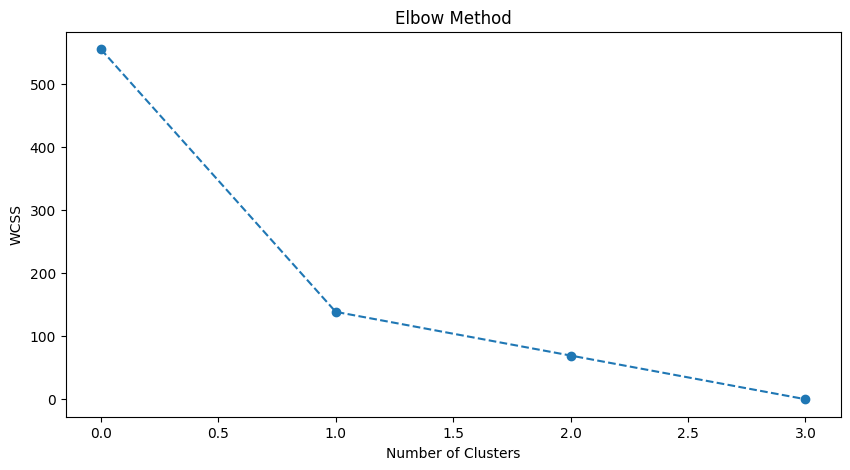

In [26]:
# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(0, 4), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

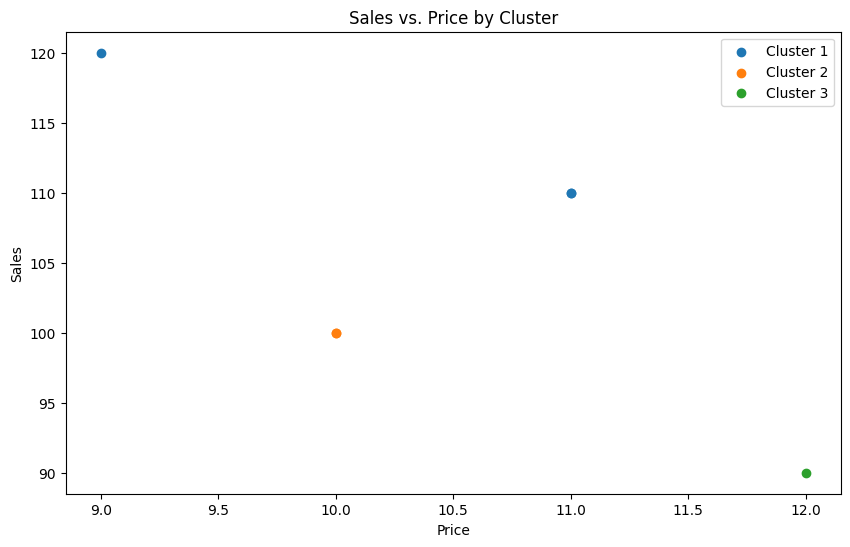

Cluster 1:
    Store   City  Price  Sales  Cluster
2  Store3  City2     11    110        0
3  Store4  City2      9    120        0
5  Store6  City3     11    110        0
Cluster 2:
    Store   City  Price  Sales  Cluster
0  Store1  City1     10    100        1
4  Store5  City3     10    100        1
Cluster 3:
    Store   City  Price  Sales  Cluster
1  Store2  City1     12     90        2


In [28]:
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Price'], cluster_data['Sales'], label=f'Cluster {cluster+1}')
plt.title('Sales vs. Price by Cluster')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Analyze clusters
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster+1}:")
    print(cluster_data)

In [29]:
# Sample data (replace this with your actual dataset)
data = {
    'Store': ['Store1', 'Store2', 'Store3', 'Store1', 'Store2', 'Store3'],
    'City': ['City1', 'City1', 'City2', 'City2', 'City3', 'City3'],
    'State': ['State1', 'State1', 'State2', 'State2', 'State3', 'State3'],
    'Week': [1, 1, 1, 2, 2, 2],
    'Quarter': [1, 1, 2, 2, 3, 3],
    'Price': [10, 12, 11, 9, 10, 11],
    'Demand': [100, 90, 110, 120, 100, 110]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

In [30]:
df

,Store,City,State,Week,Quarter,Price,Demand
0,Store1,City1,State1,1,1,10,100
1,Store2,City1,State1,1,1,12,90
2,Store3,City2,State2,1,2,11,110
3,Store1,City2,State2,2,2,9,120
4,Store2,City3,State3,2,3,10,100
5,Store3,City3,State3,2,3,11,110


In [31]:
# Sample data (replace this with your actual dataset)
data = {
    'Store': ['Store1', 'Store1', 'Store1', 'Store2', 'Store2', 'Store2'],
    'Week': [1, 2, 3, 1, 2, 3],
    'Price': [10, 12, 11, 9, 10, 11],
    'Demand': [100, 90, 110, 120, 100, 110]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

In [32]:
df

,Store,Week,Price,Demand
0,Store1,1,10,100
1,Store1,2,12,90
2,Store1,3,11,110
3,Store2,1,9,120
4,Store2,2,10,100
5,Store2,3,11,110


In [1]:
import pandas as pd
import pylogit as pl

# Load your choice data containing the choices made by individuals
# Each row represents an individual's choice among the available alternatives
choice_data = pd.read_csv("choice_data.csv")

# Create a specification for the attributes (features) of the products
specification = {"Alternative 1": [("attribute1", "all"),
                                   ("attribute2", "all"),
                                   # Add more attributes as needed
                                  ],
                 "Alternative 2": [("attribute1", "all"),
                                   ("attribute2", "all"),
                                   # Add more attributes as needed
                                  ],
                 # Add specifications for other alternatives
                }

# Create a design matrix using the specification and choice data
design_matrix = pl.DesignMatrix(specification=specification,
                                 data=choice_data,
                                 names=["attribute1", "attribute2",  # Add attribute names
                                        # Add more attribute names as needed
                                       ])

# Specify the model type (MNL, HB, MXL, LC, etc.)
model_type = "MNL"  # You can change this to other types as needed

# Initialize the choice model
choice_model = pl.create_choice_model(data=choice_data,
                                      alt_id_col="choice_column_name",  # Column containing chosen alternative
                                      obs_id_col="observation_id_column",  # Column identifying each observation
                                      choice_col="choice_column_name",  # Column containing choice indicator
                                      specification=specification,
                                      model_type=model_type)

# Fit the choice model to the data
choice_model.fit_mle()

# Print model summary
print(choice_model.get_statsmodels_summary())

# Obtain attribute importance scores
attribute_importance = choice_model.get_attribute_level_importance()

# Print attribute importance scores
print(attribute_importance)


ModuleNotFoundError: No module named 'pylogit'

In [7]:
import numpy as np

# Prices of alternatives A,B,C and D
price = np.array([2, 3, 4, 5])  

# Quality of alternatives A,B,C and D
quality = np.array([4, 5, 3, 6]) 

choices = np.array([0, 1, 0, 1])

In [8]:


# Define parameters (coefficients) for price and quality
beta_price = 15.469503616107126
beta_quality =30.939007654487742

# Calculate utilities for each alternative
utility_A = beta_price * price[0] + beta_quality * quality[0]
utility_B = beta_price * price[1] + beta_quality * quality[1]

print("Utility of Alternative A:", utility_A)
print("Utility of Alternative B:", utility_B)


Utility of Alternative A: 154.69503785016522
Utility of Alternative B: 201.1035491207601


In [9]:
exponential_utility_A = np.exp(utility_A)
exponential_utility_B = np.exp(utility_B)

total_exponential_utility = exponential_utility_A + exponential_utility_B

In [10]:
total_exponential_utility

2.1785206167740458e+87

In [11]:
probability_A = exponential_utility_A / total_exponential_utility
probability_B = exponential_utility_B / total_exponential_utility

print("Probability of choosing Alternative A:", probability_A)
print("Probability of choosing Alternative B:", probability_B)

Probability of choosing Alternative A: 6.999058795855083e-21
Probability of choosing Alternative B: 1.0


In [6]:
import numpy as np
from scipy.optimize import minimize

# Simulated choice data

# Define logit function
def logit_utility(params, price, quality):
    beta_price, beta_quality = params
    utilities = beta_price * price + beta_quality * quality
    exponential_utilities = np.exp(utilities)
    probabilities = exponential_utilities / np.sum(exponential_utilities)
    return probabilities

# Define negative log likelihood function
def negative_log_likelihood(params, price, quality, choices):
    probabilities = logit_utility(params, price, quality)
    chosen_probabilities = probabilities[choices == 1]
    log_likelihood = np.sum(np.log(chosen_probabilities))
    return -log_likelihood

# Initial guess for parameters
initial_params = np.array([0, 0])

# Perform Maximum Likelihood Estimation using Gradient Descent
result = minimize(negative_log_likelihood, initial_params, args=(price, quality, choices), method='CG')

# Extract estimated parameters
estimated_params = result.x
beta_price, beta_quality = estimated_params

print("Estimated beta_price:", beta_price)
print("Estimated beta_quality:", beta_quality)


Estimated beta_price: -15.469503616107126
Estimated beta_quality: 30.939007654487742


In [12]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Smartphone Brand': ['Apple', 'Samsung', 'Google Pixel', 'Apple', 'Samsung', 'Google Pixel', 'Apple', 'Samsung', 'Google Pixel'],
    'Price ($)': [1000, 800, 700, 1100, 750, 720, 1050, 780, 730],
    'Quantity Sold': [500, 700, 600, 450, 720, 580, 480, 710, 590]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


  Smartphone Brand  Price ($)  Quantity Sold
0            Apple       1000            500
1          Samsung        800            700
2     Google Pixel        700            600
3            Apple       1100            450
4          Samsung        750            720
5     Google Pixel        720            580
6            Apple       1050            480
7          Samsung        780            710
8     Google Pixel        730            590


In [13]:
import pandas as pd

# Create DataFrame from the provided dataset
data = {
    'Smartphone Brand': ['Apple', 'Samsung', 'Google Pixel', 'Apple', 'Samsung', 'Google Pixel', 'Apple', 'Samsung', 'Google Pixel'],
    'Price ($)': [1000, 800, 700, 1100, 750, 720, 1050, 780, 730],
    'Quantity Sold': [500, 700, 600, 450, 720, 580, 480, 710, 590]
}

df = pd.DataFrame(data)

# Calculate odds ratios between pairs of alternatives
def calculate_odds_ratio(df, alt1, alt2):
    alt1_df = df[df['Smartphone Brand'] == alt1]
    alt2_df = df[df['Smartphone Brand'] == alt2]

    odds_ratio_price = (alt1_df['Price ($)'].mean() / alt2_df['Price ($)'].mean())
    odds_ratio_quantity = (alt1_df['Quantity Sold'].mean() / alt2_df['Quantity Sold'].mean())

    return odds_ratio_price, odds_ratio_quantity

# Calculate odds ratios for each pair
odds_ratio_apple_samsung = calculate_odds_ratio(df, 'Apple', 'Samsung')
odds_ratio_apple_google_pixel = calculate_odds_ratio(df, 'Apple', 'Google Pixel')
odds_ratio_samsung_google_pixel = calculate_odds_ratio(df, 'Samsung', 'Google Pixel')

# Print results
print("Odds Ratio (Apple vs. Samsung) - Price:", odds_ratio_apple_samsung[0], ", Quantity:", odds_ratio_apple_samsung[1])
print("Odds Ratio (Apple vs. Google Pixel) - Price:", odds_ratio_apple_google_pixel[0], ", Quantity:", odds_ratio_apple_google_pixel[1])
print("Odds Ratio (Samsung vs. Google Pixel) - Price:", odds_ratio_samsung_google_pixel[0], ", Quantity:", odds_ratio_samsung_google_pixel[1])


Odds Ratio (Apple vs. Samsung) - Price: 1.351931330472103 , Quantity: 0.6713615023474179
Odds Ratio (Apple vs. Google Pixel) - Price: 1.4651162790697676 , Quantity: 0.807909604519774
Odds Ratio (Samsung vs. Google Pixel) - Price: 1.083720930232558 , Quantity: 1.2033898305084745
